<a href="https://colab.research.google.com/github/Sievv/AMPs-against-KP/blob/main/KP_balance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load your original features and target.

Combine them to one DataFrame.

Perform random undersampling on the majority class (Inactive).

Save the balanced dataset back.

Original class distribution:
Target
0    298
1    110

In [2]:
import pandas as pd
from sklearn.utils import resample
import os

# Step 1: Load your training features and target
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train.csv')  # Features
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train.csv').squeeze()  # Target as Series

# Step 2: Combine features and target for easier manipulation
train_data = X_train.copy()
train_data['Target'] = y_train

# Step 3: Show original class distribution
print("Original class distribution:")
print(train_data['Target'].value_counts())

# Step 4: Separate majority and minority classes
majority = train_data[train_data['Target'] == 0]  # Inactive
minority = train_data[train_data['Target'] == 1]  # Active

# Step 5: Downsample majority to minority class size
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Step 6: Combine minority class with downsampled majority class
balanced_data = pd.concat([minority, majority_downsampled])

# Step 7: Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 8: Show new class distribution
print("\nBalanced class distribution:")
print(balanced_data['Target'].value_counts())

# Step 9: Separate features and target again
X_balanced = balanced_data.drop(columns=['Target'])
y_balanced = balanced_data['Target']

# Step 10: Ensure save directory exists
save_dir = '/content/drive/MyDrive/KP/KP balance'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Step 11: Save balanced datasets
X_balanced.to_csv(f'{save_dir}/X_train_balanced.csv', index=False)
y_balanced.to_csv(f'{save_dir}/y_train_balanced.csv', index=False)

print("\nBalanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory:", save_dir)


Original class distribution:
Target
0    298
1    110
Name: count, dtype: int64

Balanced class distribution:
Target
0    110
1    110
Name: count, dtype: int64

Balanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory: /content/drive/MyDrive/KP/KP balance


In [5]:
import pandas as pd

X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()


Build Model

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Initialize only RF, GB, XGBoost with random_state=None
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_balanced)

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)


Training Random Forest...

Random Forest - Confusion Matrix:
[[110   0]
 [  0 110]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[110   0]
 [  0 110]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

-------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


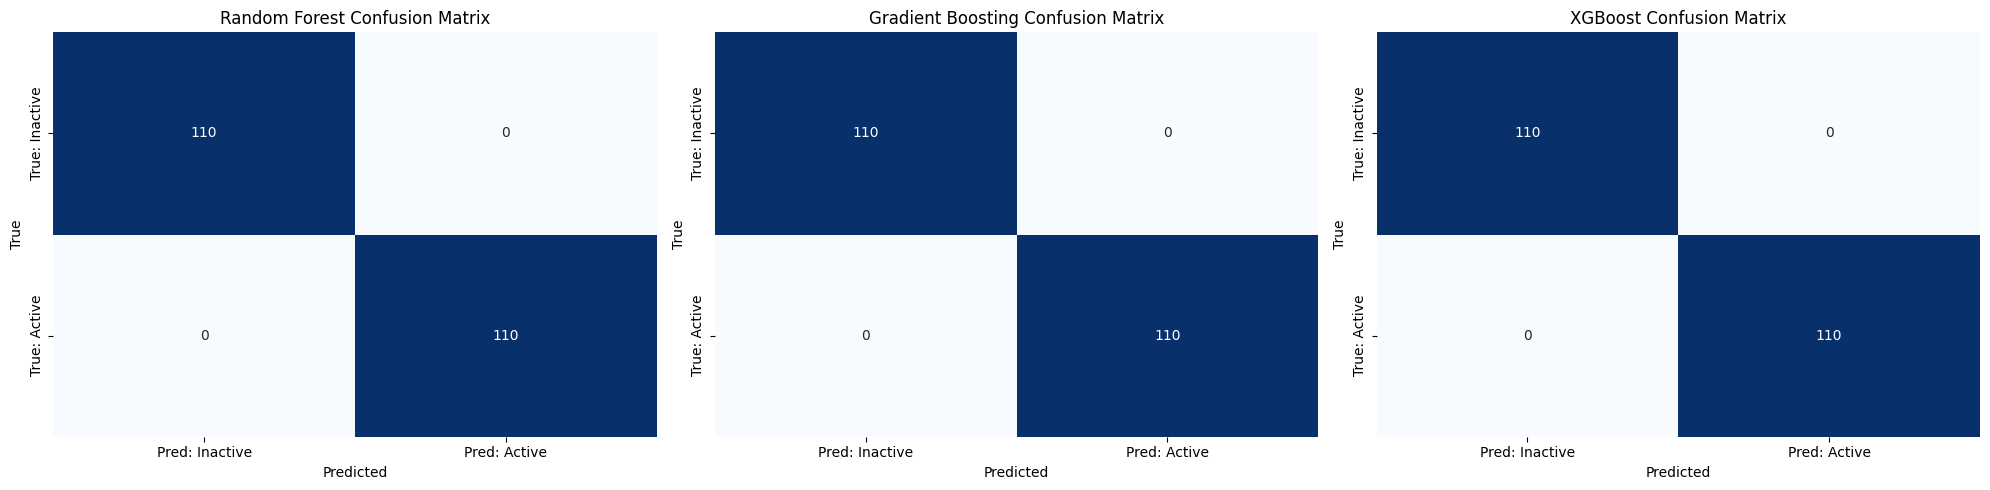

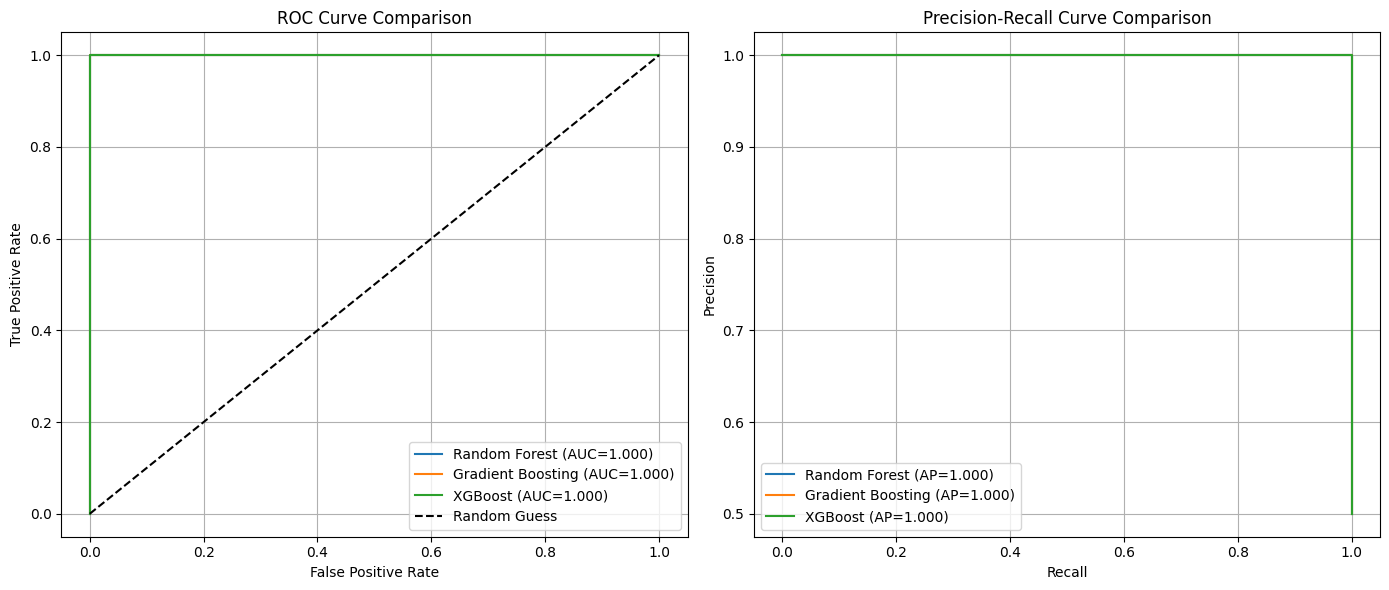

               Model  Accuracy  MCC  ROC AUC  PR AUC
0      Random Forest       1.0  1.0      1.0     1.0
1  Gradient Boosting       1.0  1.0      1.0     1.0
2            XGBoost       1.0  1.0      1.0     1.0


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    matthews_corrcoef, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Initialize only RF, GB, XGBoost with random_state=None
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None)
}

metrics = {
    'Model': [],
    'Accuracy': [],
    'MCC': [],
    'ROC AUC': [],
    'PR AUC': []
}

# Train models and predict on train data (for demonstration)
y_true = y_balanced

# Prepare plot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, len(models), figsize=(20, 5))

# Prepare ROC and PR curves plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for idx, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced, y_balanced)

    y_pred = model.predict(X_balanced)
    y_prob = model.predict_proba(X_balanced)[:, 1]

    # Metrics calculation
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['MCC'].append(mcc)
    metrics['ROC AUC'].append(roc_auc)
    metrics['PR AUC'].append(pr_auc)

    # Plot confusion matrix side-by-side
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Plot PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

plt.tight_layout()
fig_cm.tight_layout()

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Display performance metrics table
metrics_df = pd.DataFrame(metrics)
print(metrics_df)



Running Random Forest for 3 runs with random_state=None...

Run 1 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 2 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 3 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000

Running Gradient Boosting for 3 runs with random_state=None...

Run 1 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 2 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 3 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000

Running XGBoost for 3 runs with random_state=None...

Run 1 / 3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:22:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 2 / 3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:22:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000
Run 3 / 3
MCC: 1.0000, Precision: 1.0000, F1: 1.0000, Sensitivity: 1.0000, Specificity: 1.0000, PR AUC: 1.0000

Summary statistics (mean ± std):

Random Forest:
  MCC: 1.0000 ± 0.0000
  Precision: 1.0000 ± 0.0000
  F1: 1.0000 ± 0.0000
  Specificity: 1.0000 ± 0.0000
  Sensitivity: 1.0000 ± 0.0000
  PR AUC: 1.0000 ± 0.0000

Gradient Boosting:
  MCC: 1.0000 ± 0.0000
  Precision: 1.0000 ± 0.0000
  F1: 1.0000 ± 0.0000
  Specificity: 1.0000 ± 0.0000
  Sensitivity: 1.0000 ± 0.0000
  PR AUC: 1.0000 ± 0.0000

XGBoost:
  MCC: 1.0000 ± 0.0000
  Precision: 1.0000 ± 0.0000
  F1: 1.0000 ± 0.0000
  Specificity: 1.0000 ± 0.0000
  Sensitivity: 1.0000 ± 0.0000
  PR AUC: 1.0000 ± 0.0000

               Model  MCC Mean  MCC SD  Precision Mean  Precision SD  F1 Mean  \
0      Random Forest       1.0     0.0             1.0           0.0      1.0   
1  Gradient Boosting       1.0     0.0             1.0     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:22:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


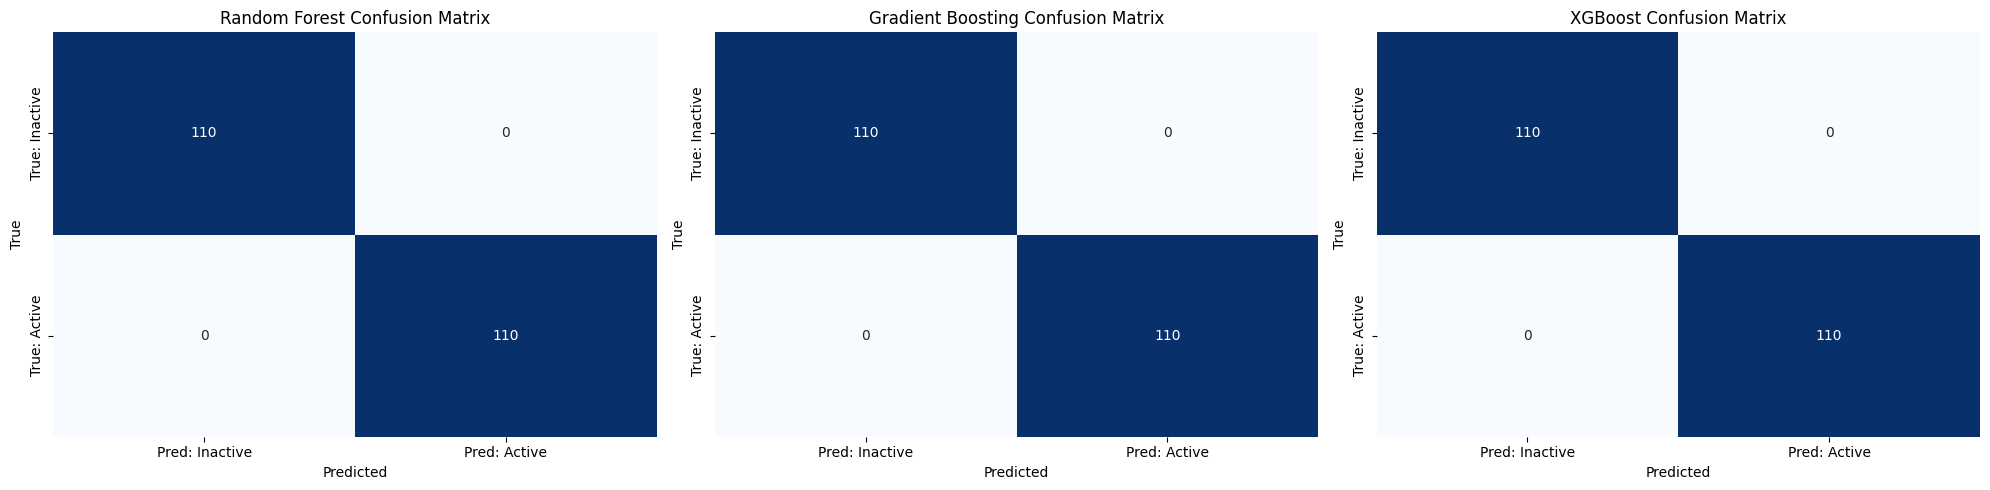

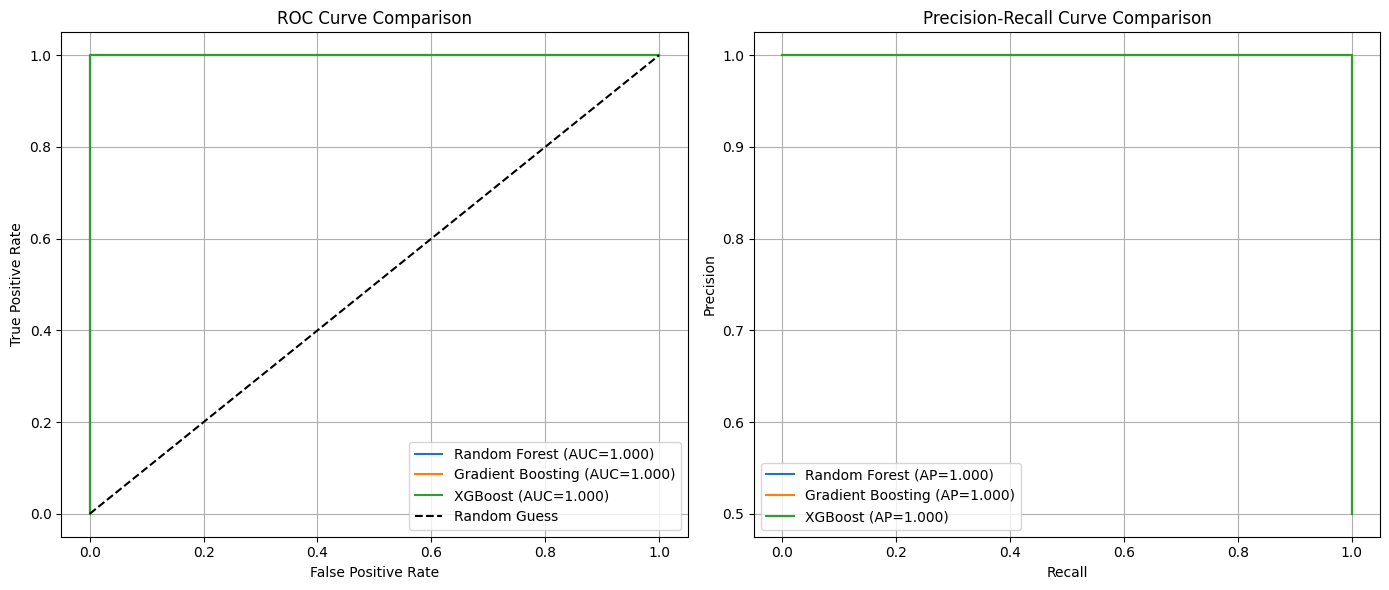

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, average_precision_score,
    precision_recall_curve, matthews_corrcoef,
    accuracy_score, precision_score, f1_score, recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None)
}

n_runs = 3

# Store all metrics per model per run
all_metrics = {
    name: {
        'MCC': [], 'Precision': [], 'F1': [],
        'Specificity': [], 'Sensitivity': [], 'PR AUC': []
    }
    for name in models.keys()
}

# For plotting confusion matrices and curves later (only last run)
last_run_results = {}

for name, model_proto in models.items():
    print(f"\nRunning {name} for {n_runs} runs with random_state=None...\n")
    for run in range(1, n_runs + 1):
        print(f"Run {run} / {n_runs}")
        # Re-initialize model to get new random_state=None each time
        model = model_proto.__class__(**model_proto.get_params())
        model.fit(X_balanced, y_balanced)

        y_pred = model.predict(X_balanced)
        y_prob = model.predict_proba(X_balanced)[:, 1]

        mcc = matthews_corrcoef(y_balanced, y_pred)
        precision = precision_score(y_balanced, y_pred)
        f1 = f1_score(y_balanced, y_pred)
        sensitivity = recall_score(y_balanced, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_balanced, y_pred).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        pr_auc = average_precision_score(y_balanced, y_prob)

        all_metrics[name]['MCC'].append(mcc)
        all_metrics[name]['Precision'].append(precision)
        all_metrics[name]['F1'].append(f1)
        all_metrics[name]['Sensitivity'].append(sensitivity)
        all_metrics[name]['Specificity'].append(specificity)
        all_metrics[name]['PR AUC'].append(pr_auc)

        print(f"MCC: {mcc:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}, "
              f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, PR AUC: {pr_auc:.4f}")

        if run == n_runs:
            # Save last run results for plotting
            last_run_results[name] = {
                'model': model,
                'y_pred': y_pred,
                'y_prob': y_prob
            }

# Print summary statistics for all models
print("\nSummary statistics (mean ± std):\n")
summary = []
for name, metrics_dict in all_metrics.items():
    print(f"{name}:")
    summary_row = {'Model': name}
    for metric, values in metrics_dict.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        summary_row[f"{metric} Mean"] = mean_val
        summary_row[f"{metric} SD"] = std_val
        print(f"  {metric}: {mean_val:.4f} ± {std_val:.4f}")
    print()
    summary.append(summary_row)

metrics_df = pd.DataFrame(summary)
print(metrics_df)

# Plot confusion matrices side-by-side for last runs
fig_cm, axes_cm = plt.subplots(1, len(models), figsize=(20, 5))

for idx, (name, res) in enumerate(last_run_results.items()):
    cm = confusion_matrix(y_balanced, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

# Plot ROC and PR curves (last run)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for name, res in last_run_results.items():
    fpr, tpr, _ = roc_curve(y_balanced, res['y_prob'])
    roc_auc = roc_auc_score(y_balanced, res['y_prob'])
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    precision, recall, _ = precision_recall_curve(y_balanced, res['y_prob'])
    pr_auc = average_precision_score(y_balanced, res['y_prob'])
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Compare Model

Predict with test set


Training and evaluating Random Forest for 3 runs...

Run 1/3 for Random Forest
Accuracy: 0.9417, MCC: 0.8529, Precision: 0.8929, F1: 0.8929, Sensitivity: 0.8929, Specificity: 0.9600, PR AUC: 0.9716, ROC AUC: 0.9886
Run 2/3 for Random Forest
Accuracy: 0.9515, MCC: 0.8790, Precision: 0.8966, F1: 0.9123, Sensitivity: 0.9286, Specificity: 0.9600, PR AUC: 0.9749, ROC AUC: 0.9910
Run 3/3 for Random Forest
Accuracy: 0.9320, MCC: 0.8266, Precision: 0.8889, F1: 0.8727, Sensitivity: 0.8571, Specificity: 0.9600, PR AUC: 0.9697, ROC AUC: 0.9881

Training and evaluating Gradient Boosting for 3 runs...

Run 1/3 for Gradient Boosting
Accuracy: 0.9223, MCC: 0.8158, Precision: 0.8125, F1: 0.8667, Sensitivity: 0.9286, Specificity: 0.9200, PR AUC: 0.9621, ROC AUC: 0.9848
Run 2/3 for Gradient Boosting
Accuracy: 0.9223, MCC: 0.8158, Precision: 0.8125, F1: 0.8667, Sensitivity: 0.9286, Specificity: 0.9200, PR AUC: 0.9612, ROC AUC: 0.9843
Run 3/3 for Gradient Boosting
Accuracy: 0.9223, MCC: 0.8158, Precision

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9417, MCC: 0.8571, Precision: 0.8667, F1: 0.8966, Sensitivity: 0.9286, Specificity: 0.9467, PR AUC: 0.9315, ROC AUC: 0.9833

Summary statistics (mean ± std):

Random Forest:
  Accuracy: 0.9417 ± 0.0079
  MCC: 0.8528 ± 0.0214
  Precision: 0.8928 ± 0.0031
  F1: 0.8926 ± 0.0161
  Specificity: 0.9600 ± 0.0000
  Sensitivity: 0.8929 ± 0.0292
  PR AUC: 0.9721 ± 0.0022
  ROC AUC: 0.9892 ± 0.0012

Gradient Boosting:
  Accuracy: 0.9223 ± 0.0000
  MCC: 0.8158 ± 0.0000
  Precision: 0.8125 ± 0.0000
  F1: 0.8667 ± 0.0000
  Specificity: 0.9200 ± 0.0000
  Sensitivity: 0.9286 ± 0.0000
  PR AUC: 0.9618 ± 0.0004
  ROC AUC: 0.9846 ± 0.0002

XGBoost:
  Accuracy: 0.9417 ± 0.0000
  MCC: 0.8571 ± 0.0000
  Precision: 0.8667 ± 0.0000
  F1: 0.8966 ± 0.0000
  Specificity: 0.9467 ± 0.0000
  Sensitivity: 0.9286 ± 0.0000
  PR AUC: 0.9315 ± 0.0000
  ROC AUC: 0.9833 ± 0.0000

               Model  Accuracy Mean  Accuracy SD  MCC Mean        MCC SD  \
0      Random Forest       0.941748     0.007927  0.8528

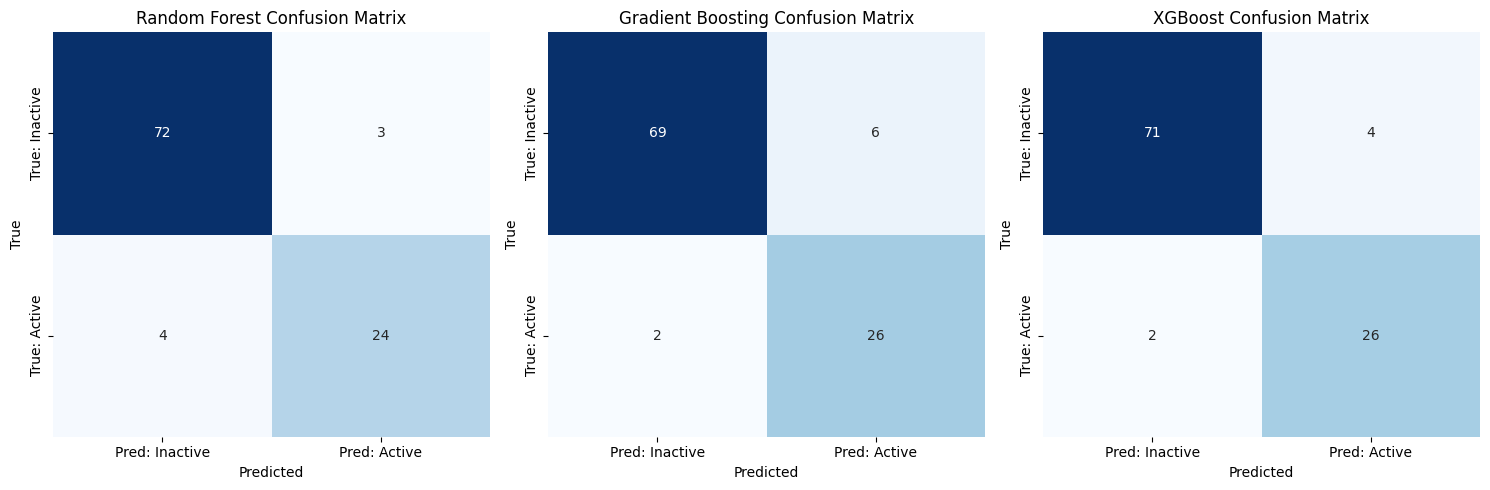

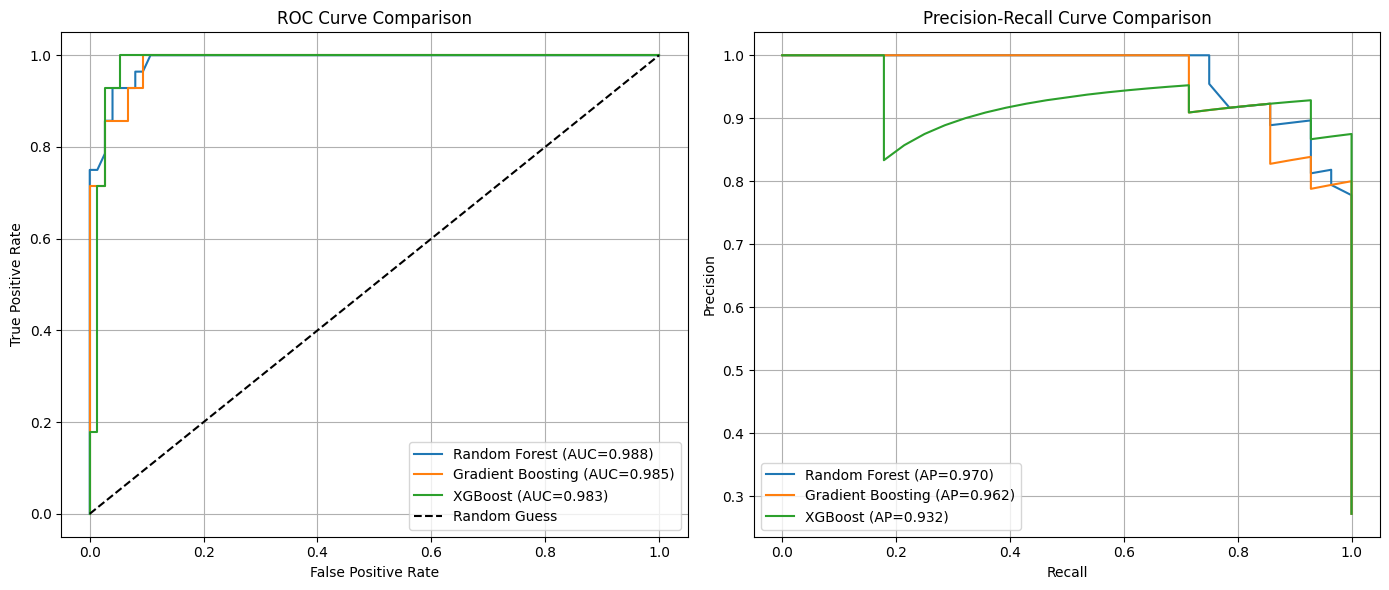

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, matthews_corrcoef,
    average_precision_score, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Load train and test data
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_test.csv').squeeze()

models_info = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None)
}

n_runs = 3

# Store metrics per model and run
metrics_all = {
    name: {
        'Accuracy': [], 'MCC': [], 'Precision': [], 'F1': [],
        'Specificity': [], 'Sensitivity': [], 'PR AUC': [], 'ROC AUC': []
    }
    for name in models_info.keys()
}

last_run_results = {}

for name, model_proto in models_info.items():
    print(f"\nTraining and evaluating {name} for {n_runs} runs...\n")
    for run in range(1, n_runs + 1):
        print(f"Run {run}/{n_runs} for {name}")
        model = model_proto.__class__(**model_proto.get_params())
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        sens = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        pr_auc = average_precision_score(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        metrics_all[name]['Accuracy'].append(acc)
        metrics_all[name]['MCC'].append(mcc)
        metrics_all[name]['Precision'].append(prec)
        metrics_all[name]['F1'].append(f1)
        metrics_all[name]['Sensitivity'].append(sens)
        metrics_all[name]['Specificity'].append(spec)
        metrics_all[name]['PR AUC'].append(pr_auc)
        metrics_all[name]['ROC AUC'].append(roc_auc)

        print(f"Accuracy: {acc:.4f}, MCC: {mcc:.4f}, Precision: {prec:.4f}, F1: {f1:.4f}, Sensitivity: {sens:.4f}, Specificity: {spec:.4f}, PR AUC: {pr_auc:.4f}, ROC AUC: {roc_auc:.4f}")

        if run == n_runs:
            last_run_results[name] = {'y_pred': y_pred, 'y_prob': y_prob}

# Summary statistics output
print("\nSummary statistics (mean ± std):\n")
summary = []
for name, metric_dict in metrics_all.items():
    print(f"{name}:")
    row = {'Model': name}
    for metric, values in metric_dict.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        print(f"  {metric}: {mean_val:.4f} ± {std_val:.4f}")
        row[f"{metric} Mean"] = mean_val
        row[f"{metric} SD"] = std_val
    print()
    summary.append(row)

metrics_df = pd.DataFrame(summary)
print(metrics_df)

# Plot confusion matrices
fig_cm, axes_cm = plt.subplots(1, len(models_info), figsize=(5 * len(models_info), 5))
if len(models_info) == 1:
    axes_cm = [axes_cm]

for idx, (name, res) in enumerate(last_run_results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

# Plot ROC and PR curves for last runs
fig_curves, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(14, 6))

ax_roc.set_title('ROC Curve Comparison')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')

ax_pr.set_title('Precision-Recall Curve Comparison')
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')

for name, res in last_run_results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    roc_auc = roc_auc_score(y_test, res['y_prob'])
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    precision, recall, _ = precision_recall_curve(y_test, res['y_prob'])
    pr_auc = average_precision_score(y_test, res['y_prob'])
    ax_pr.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax_roc.legend()
ax_roc.grid(True)

ax_pr.legend()
ax_pr.grid(True)

plt.tight_layout()
plt.show()


Save Model


Training and evaluating Random Forest for 3 runs...

Run 1/3 for Random Forest
Accuracy: 0.9515, MCC: 0.8790, Precision: 0.8966, F1: 0.9123, Sensitivity: 0.9286, Specificity: 0.9600, PR AUC: 0.9755, ROC AUC: 0.9907
Run 2/3 for Random Forest
Accuracy: 0.9417, MCC: 0.8529, Precision: 0.8929, F1: 0.8929, Sensitivity: 0.8929, Specificity: 0.9600, PR AUC: 0.9761, ROC AUC: 0.9907
Run 3/3 for Random Forest
Accuracy: 0.9223, MCC: 0.8038, Precision: 0.8571, F1: 0.8571, Sensitivity: 0.8571, Specificity: 0.9467, PR AUC: 0.9687, ROC AUC: 0.9867
Saved Random Forest model to /content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_model.pkl

Training and evaluating Gradient Boosting for 3 runs...

Run 1/3 for Gradient Boosting
Accuracy: 0.9223, MCC: 0.8158, Precision: 0.8125, F1: 0.8667, Sensitivity: 0.9286, Specificity: 0.9200, PR AUC: 0.9621, ROC AUC: 0.9848
Run 2/3 for Gradient Boosting
Accuracy: 0.9223, MCC: 0.8158, Precision: 0.8125, F1: 0.8667, Sensitivity: 0.9286, Specificity: 0.9200,

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:02:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9417, MCC: 0.8571, Precision: 0.8667, F1: 0.8966, Sensitivity: 0.9286, Specificity: 0.9467, PR AUC: 0.9315, ROC AUC: 0.9833
Run 2/3 for XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9417, MCC: 0.8571, Precision: 0.8667, F1: 0.8966, Sensitivity: 0.9286, Specificity: 0.9467, PR AUC: 0.9315, ROC AUC: 0.9833
Run 3/3 for XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9417, MCC: 0.8571, Precision: 0.8667, F1: 0.8966, Sensitivity: 0.9286, Specificity: 0.9467, PR AUC: 0.9315, ROC AUC: 0.9833
Saved XGBoost model to /content/drive/MyDrive/KP/KP balance/saved_models/XGBoost_model.pkl

Summary statistics (mean ± std):

Random Forest:
  Accuracy: 0.9385 ± 0.0121
  MCC: 0.8452 ± 0.0312
  Precision: 0.8822 ± 0.0178
  F1: 0.8874 ± 0.0228
  Specificity: 0.9556 ± 0.0063
  Sensitivity: 0.8929 ± 0.0292
  PR AUC: 0.9734 ± 0.0034
  ROC AUC: 0.9894 ± 0.0019

Gradient Boosting:
  Accuracy: 0.9223 ± 0.0000
  MCC: 0.8158 ± 0.0000
  Precision: 0.8125 ± 0.0000
  F1: 0.8667 ± 0.0000
  Specificity: 0.9200 ± 0.0000
  Sensitivity: 0.9286 ± 0.0000
  PR AUC: 0.9618 ± 0.0004
  ROC AUC: 0.9846 ± 0.0002

XGBoost:
  Accuracy: 0.9417 ± 0.0000
  MCC: 0.8571 ± 0.0000
  Precision: 0.8667 ± 0.0000
  F1: 0.8966 ± 0.0000
  Specificity: 0.9467 ± 0.0000
  Sensitivity: 0.9286 ± 0.0000
  PR AUC: 0.9315 ± 0.0000
  ROC AUC: 0.9833 ± 0.0000

               Model  Accuracy Mean  Accu

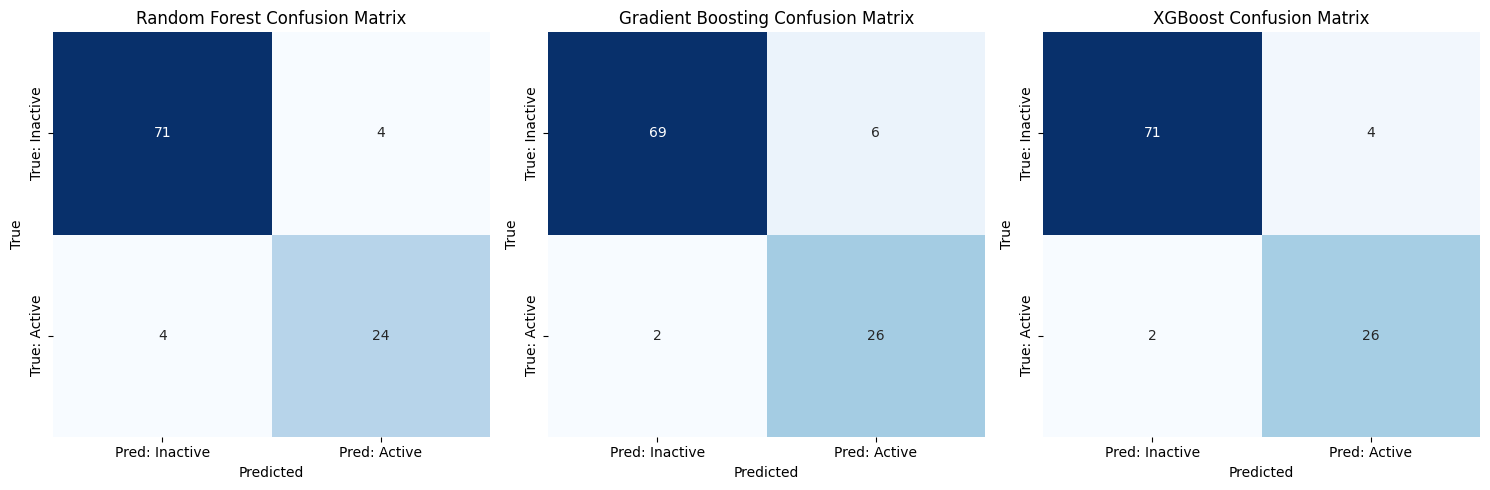

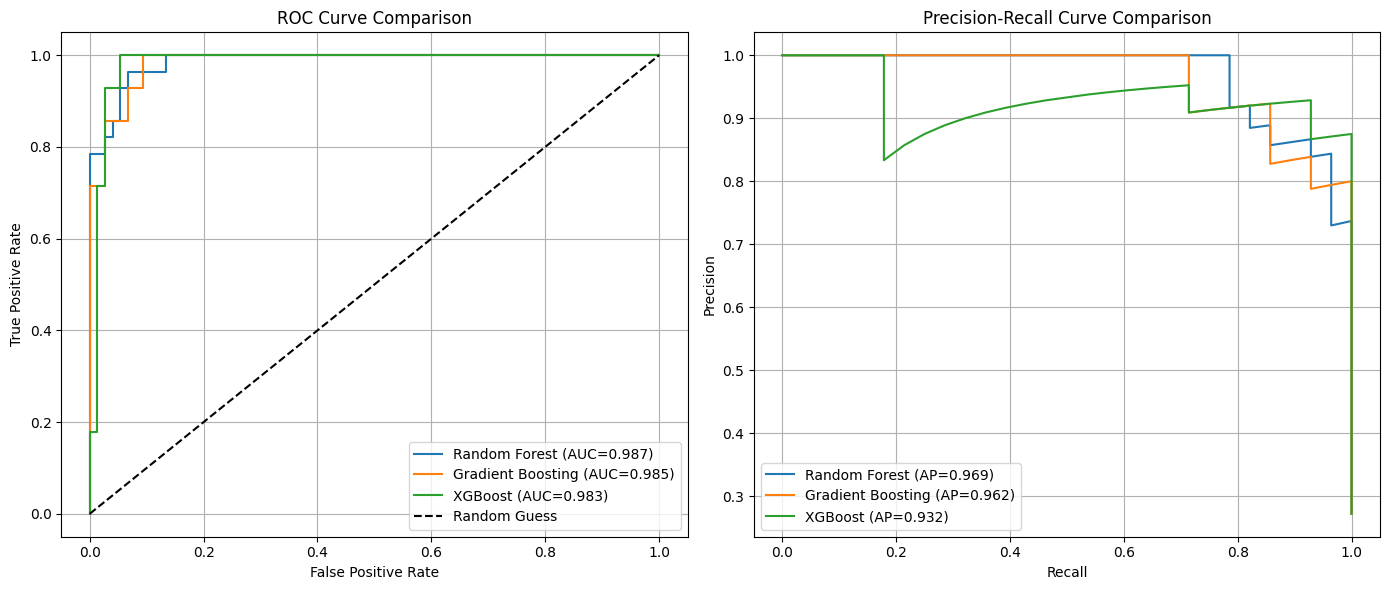

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, matthews_corrcoef,
    average_precision_score, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Paths and parameters
save_dir = '/content/drive/MyDrive/KP/KP balance/saved_models'
os.makedirs(save_dir, exist_ok=True)
n_runs = 3

# Load train and test data
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_test.csv').squeeze()

# Define models with random_state=None for randomness
models_info = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=None),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=None)
}

# Initialize metrics storage
metrics_all = {
    name: {
        'Accuracy': [], 'MCC': [], 'Precision': [], 'F1': [],
        'Specificity': [], 'Sensitivity': [], 'PR AUC': [], 'ROC AUC': []
    }
    for name in models_info.keys()
}

last_run_models = {}
last_run_results = {}

# Training, evaluation, and saving models
for name, model_proto in models_info.items():
    print(f"\nTraining and evaluating {name} for {n_runs} runs...\n")
    for run in range(1, n_runs + 1):
        print(f"Run {run}/{n_runs} for {name}")
        model = model_proto.__class__(**model_proto.get_params())
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        sens = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        pr_auc = average_precision_score(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        metrics_all[name]['Accuracy'].append(acc)
        metrics_all[name]['MCC'].append(mcc)
        metrics_all[name]['Precision'].append(prec)
        metrics_all[name]['F1'].append(f1)
        metrics_all[name]['Sensitivity'].append(sens)
        metrics_all[name]['Specificity'].append(spec)
        metrics_all[name]['PR AUC'].append(pr_auc)
        metrics_all[name]['ROC AUC'].append(roc_auc)

        print(f"Accuracy: {acc:.4f}, MCC: {mcc:.4f}, Precision: {prec:.4f}, F1: {f1:.4f}, Sensitivity: {sens:.4f}, Specificity: {spec:.4f}, PR AUC: {pr_auc:.4f}, ROC AUC: {roc_auc:.4f}")

        if run == n_runs:
            last_run_models[name] = model
            last_run_results[name] = {'y_pred': y_pred, 'y_prob': y_prob}

            # Save model
            filename = os.path.join(save_dir, f"{name.replace(' ', '_')}_model.pkl")
            joblib.dump(model, filename)
            print(f"Saved {name} model to {filename}")

# Summary statistics
print("\nSummary statistics (mean ± std):\n")
summary = []
for name, metric_dict in metrics_all.items():
    print(f"{name}:")
    row = {'Model': name}
    for metric, values in metric_dict.items():
        mean_val = np.mean(values)
        std_val = np.std(values)
        print(f"  {metric}: {mean_val:.4f} ± {std_val:.4f}")
        row[f"{metric} Mean"] = mean_val
        row[f"{metric} SD"] = std_val
    print()
    summary.append(row)

metrics_df = pd.DataFrame(summary)
print(metrics_df)

# Plot confusion matrices
fig_cm, axes_cm = plt.subplots(1, len(models_info), figsize=(5 * len(models_info), 5))
if len(models_info) == 1:
    axes_cm = [axes_cm]

for idx, (name, res) in enumerate(last_run_results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

# Plot ROC and PR curves for last runs
fig_curves, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(14, 6))

ax_roc.set_title('ROC Curve Comparison')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')

ax_pr.set_title('Precision-Recall Curve Comparison')
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')

for name, res in last_run_results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    roc_auc = roc_auc_score(y_test, res['y_prob'])
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    precision, recall, _ = precision_recall_curve(y_test, res['y_prob'])
    pr_auc = average_precision_score(y_test, res['y_prob'])
    ax_pr.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax_roc.legend()
ax_roc.grid(True)

ax_pr.legend()
ax_pr.grid(True)

plt.tight_layout()
plt.show()


Step: Train with fixed random_state and save model

In [15]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

save_dir = '/content/drive/MyDrive/KP/KP balance/saved_models'
os.makedirs(save_dir, exist_ok=True)

X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Models with fixed random_state=42 for reproducibility
models_fixed = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

for name, model in models_fixed.items():
    print(f"Training {name} with fixed random_state=42...")
    model.fit(X_train, y_train)

    # Save model with 'fix_model' in filename
    filename = os.path.join(save_dir, f"{name.replace(' ', '_')}_fix_model.pkl")
    joblib.dump(model, filename)
    print(f"Saved {name} fixed model to {filename}")


Training Random Forest with fixed random_state=42...
Saved Random Forest fixed model to /content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_fix_model.pkl
Training Gradient Boosting with fixed random_state=42...
Saved Gradient Boosting fixed model to /content/drive/MyDrive/KP/KP balance/saved_models/Gradient_Boosting_fix_model.pkl
Training XGBoost with fixed random_state=42...
Saved XGBoost fixed model to /content/drive/MyDrive/KP/KP balance/saved_models/XGBoost_fix_model.pkl


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
import joblib
import pandas as pd

save_dir = '/content/drive/MyDrive/KP/KP balance/saved_models'

model_paths = {
    'Random Forest': f'{save_dir}/Random_Forest_fix_model.pkl',
    'Gradient Boosting': f'{save_dir}/Gradient_Boosting_fix_model.pkl',
    'XGBoost': f'{save_dir}/XGBoost_fix_model.pkl'
}

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')

for name, path in model_paths.items():
    model = joblib.load(path)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    print(f"\n{name} Predictions:")
    print(y_pred)
    print(f"\n{name} Predicted Probabilities (Positive Class):")
    print(y_prob)



Random Forest Predictions:
[0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]

Random Forest Predicted Probabilities (Positive Class):
[0.17 0.02 0.01 0.64 0.9  0.09 0.53 0.1  0.14 0.04 0.99 0.   0.04 0.29
 0.09 0.49 0.92 0.01 0.06 0.13 0.02 0.98 0.05 0.19 0.03 0.18 0.03 0.13
 0.19 0.23 0.06 0.05 0.98 0.2  0.01 0.36 0.13 0.74 0.09 0.22 0.44 0.15
 0.96 0.02 0.08 0.22 0.58 0.02 0.89 0.12 0.09 0.85 0.64 1.   0.06 0.2
 0.83 0.02 0.16 0.23 0.   0.1  0.01 0.18 0.25 0.05 0.19 0.   0.42 0.08
 0.13 0.03 0.95 0.06 0.21 0.97 0.8  0.15 0.97 0.33 0.53 0.89 0.95 0.5
 0.87 0.1  0.08 0.99 0.09 0.36 0.23 0.12 0.25 0.35 0.01 0.92 0.33 0.67
 0.17 0.12 0.86 0.48 0.05]

Gradient Boosting Predictions:
[0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 

In [17]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5883fa13b0c1b4a118fffdec3906e7153aa96884c5c809dc21197f6294ab9acc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [23]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

# Load model
model = joblib.load('/content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_fix_model.pkl')

# Load your training data (needed by LIME to understand feature distribution)
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')

# Load a sample to explain from test or new data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
instance = X_test.iloc[0].values  # explain first test instance

# Initialize Lime explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Explain prediction for the chosen instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=12
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print explanation as text
print(exp.as_list())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('7.93 < Isoelectric_Point <= 9.51', -0.06398890862325982), ('I <= 2.68', -0.05627225025798092), ('1.00 < Charge <= 4.00', -0.04367646943989798), ('P > 8.33', -0.036704445420764384), ('0.00 < E <= 6.20', -0.0315082408058105), ('W <= 0.00', -0.029929814683187148), ('T > 4.55', -0.024390594871656353), ('10.34 < K <= 16.79', 0.023465304905828467), ('3.33 < G <= 6.90', -0.0195475252184639), ('M > 3.08', -0.014437656546191542), ('10.00 < Helix <= 13.00', 0.013255926874626326), ('25.00 < Length <= 34.00', 0.01318172601050021)]


In [28]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

# Load model
model = joblib.load('/content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_fix_model.pkl')

# Load training data (needed for LIME background)
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')

# Select first test instance
instance = X_test.iloc[100].values

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Predict probabilities for the instance
probs = model.predict_proba(instance.reshape(1, -1))[0]
print(f"Prediction probabilities for sample 0:\nInactive: {probs[0]:.4f}, Active: {probs[1]:.4f}\n")

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=101
)

# Show explanation table in notebook (if using Jupyter)
exp.show_in_notebook(show_table=True)

# Or print explanation as list of feature contributions
print("LIME Explanation for sample 0:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction probabilities for sample 0:
Inactive: 0.1400, Active: 0.8600



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME Explanation for sample 0:
Charge > 6.00: 0.1260
Isoelectric_Point > 10.99: 0.1040
E <= 0.00: 0.0681
3.81 < K <= 10.34: -0.0578
I > 9.56: 0.0551
Q <= 0.00: 0.0548
D <= 0.00: 0.0485
W > 3.25: 0.0336
S <= 0.00: 0.0256
V > 9.09: 0.0221
Flexibility > 0.46: 0.0209
H <= 0.00: 0.0186
25.00 < Length <= 34.00: 0.0160
M <= 0.00: 0.0136
3.33 < G <= 6.90: -0.0120
Hydrophobicity > 15.00: -0.0086
Number_of_Disulfide_Bridges <= 0.00: -0.0066
6.67 < R <= 13.89: -0.0065
2793.25 < Molecular_Weight <= 3843.09: 0.0065
A > 11.11: 0.0060
Helix > 13.00: -0.0058
N > 5.26: -0.0054
0.00 < T <= 4.55: 0.0053
Number_of_Cysteines <= 0.00: 0.0051
C <= 0.00: 0.0048
2.00 < Turn <= 3.00: 0.0027
3.28 < P <= 8.33: -0.0022
0.00 < Y <= 4.04: 0.0021
2.00 < Sheet <= 3.00: 0.0019
2.70 < F <= 5.71: -0.0015
4.00 < L <= 8.63: -0.0004


In [29]:
import numpy as np
import pandas as pd

# Predict probabilities for all test samples
probs = model.predict_proba(X_test)

# Find indexes where predicted class is Active (class 1)
predicted_classes = np.argmax(probs, axis=1)
active_indexes = np.where(predicted_classes == 1)[0]

if len(active_indexes) == 0:
    print("No test samples predicted as Active.")
else:
    # Choose first test sample predicted as Active
    idx = active_indexes[0]
    print(f"Explaining test sample index: {idx} predicted as Active with probability {probs[idx][1]:.4f}")

    instance = X_test.iloc[idx].values

    # Explain with LIME
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Show explanation plot (Jupyter)
    exp.show_in_notebook(show_table=True)

    # Or print explanation as text
    print("LIME explanation for this Active prediction:")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")


Explaining test sample index: 3 predicted as Active with probability 0.6400


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME explanation for this Active prediction:
Charge > 6.00: 0.1202
I > 9.56: 0.0652
E <= 0.00: 0.0640
9.51 < Isoelectric_Point <= 10.99: 0.0622
D <= 0.00: 0.0581
Length > 34.00: -0.0448
Q <= 0.00: 0.0429
S > 8.42: -0.0392
10.34 < K <= 16.79: 0.0319
W <= 0.00: -0.0295


Explaining test sample index: 3 predicted as Active with probability 0.6400


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


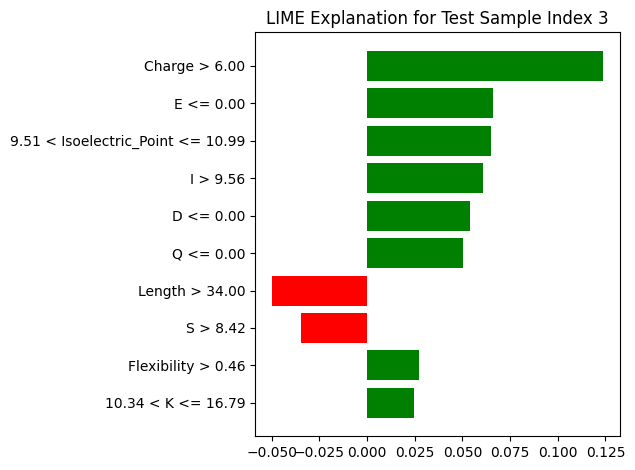

LIME explanation for this Active prediction:
Charge > 6.00: 0.1239
E <= 0.00: 0.0661
9.51 < Isoelectric_Point <= 10.99: 0.0651
I > 9.56: 0.0607
D <= 0.00: 0.0540
Q <= 0.00: 0.0505
Length > 34.00: -0.0500
S > 8.42: -0.0344
Flexibility > 0.46: 0.0275
10.34 < K <= 16.79: 0.0247


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer


# Predict probabilities for all test samples
probs = model.predict_proba(X_test)

# Find indexes where predicted class is Active (class 1)
predicted_classes = np.argmax(probs, axis=1)
active_indexes = np.where(predicted_classes == 1)[0]

if len(active_indexes) == 0:
    print("No test samples predicted as Active.")
else:
    # Choose first test sample predicted as Active
    idx = active_indexes[0]
    print(f"Explaining test sample index: {idx} predicted as Active with probability {probs[idx][1]:.4f}")

    instance = X_test.iloc[idx].values

    # Generate LIME explanation for the instance
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Show explanation as table and plot bar chart
    exp.show_in_notebook(show_table=True)

    # Alternatively, plot using matplotlib (recommended for script)
    fig = exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for Test Sample Index {idx}')
    plt.tight_layout()
    plt.show()

    # Also print textual explanation
    print("LIME explanation for this Active prediction:")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")
